# DIGIT Recognition with Tensorflow

In this notebook we will build Digit recognition system in python using **tensorflow** library and **mnist** dataset.

### Install Libraries

In [37]:
# Installing tensorflow if required.
!pip install tensorflow

### Load required Libraries 


In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Define CallBack class.


In [45]:
# Create call back class and define the "on_epoch_end" function which will be called at the end of each epoch.
# In this function we are stopping the training as soon as accuracy will reach 95%.

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.95):
            print("\nTraining Cancelled on 95% of accuracy.")
            self.model.stop_training = True
callbacks = myCallback()

### Load MNIST Data into train and test.

In [40]:
mnist_digit = tf.keras.datasets.mnist
(train_features, train_label),(test_features, test_label) = mnist_digit.load_data()
# train_features : This array contains the features of training data.
# train_label : This array contains label for training data.
# test_features : This array contains features for test data.
# test_label : This array contains label for test data.

### Display Sample Data

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

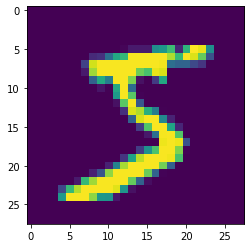

In [41]:
# Print the sample digit at a given INDEX.
INDEX = 0
plt.imshow(train_features[INDEX])
print(train_label[INDEX])
print(train_features[INDEX])

### Normaliza the Data


In [42]:
# Since each pixel is represented by 1-byte, which means the values for each pixel between 0-255.
# So lets normalize the images/data by diving each pixel with 255.
norm_train_features, norm_test_features = train_features / 255.0, test_features / 255.0

### Display Normalized Data

5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

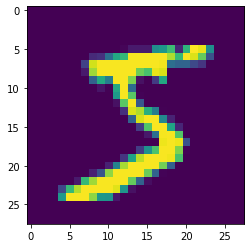

In [44]:
# Print the sample digit at a given INDEX from Normalised Data.
INDEX = 0
plt.imshow(norm_train_features[INDEX])
print(train_label[INDEX])
print(norm_train_features[INDEX])

# you can veirify the results post normalization.

### Define Neural Network

In [47]:
# Create Neural Network.
# No of Layers 3. 
# Input Layer is 28 x 28 matrix.
# 1st Hidden Layer : 256 neurons. Activation Function : RELU.
# Output layer : 10 neurons. Activation Function softmax.
nn_model = tf.keras.models.Sequential([
    # Input Layer 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 1st Hidden Layer
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # Output Layer.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model.


In [48]:
# Lets compile the model. You can try to different other params as well. 
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fit the model to Training Data.


In [49]:
# Let's try to traing out Neural Network model.
# epoch : Here we using 10 epochs. Feel free to play with it and check the accuracy.
# callbacks : As per above definition of callback, it will stop training once the accuracy will reach 95%.

nn_model.fit(train_features, train_label, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 2.5707 - acc: 0.8934
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3510 - acc: 0.9266
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2942 - acc: 0.9348
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2487 - acc: 0.9445
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2368 - acc: 0.9458
Epoch 6/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.2222 - acc: 0.9510
Training Cancelled on 95% of accuracy.
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2224 - acc: 0.9510


### Evaluate the Model

In [53]:
# Lets evaluate the model.
nn_model.evaluate(test_features, test_label)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3092 - acc: 0.9474


[0.30915524953745044, 0.9474]

### Display Model Summary

In [18]:
nn_model.summary()
# second element in Output Stage represent the number of neurons.
# Param represent the Number of weights required at each layer. 
# For Example : in First later you need 784 * 512 input weights and 512 output weights

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Do the Prediction.

### Check the Label for any Image

0


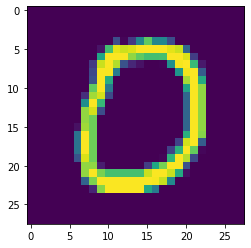

In [54]:
INDEX = 10
print(test_label[INDEX])
plt.imshow(test_features[INDEX])

# You could see that Image at Index : 10 is "0" in our test dataset. 
# Now lets try to predict based on out model.

### Check Prediction for first Image.

In [55]:
# You have seen that Image at INDEX : 10 is "0". Now lets try to predict using our Neural Network model.

# Since in the prediction you will get the probability of each number, 
# which means you will get list of 10 probabilities.
# argmax : Returns the indices of the maximum values along an axis.
prediction = nn_model.predict(test_features)
print(np.argmax(prediction[INDEX]))

0


In [56]:
# You could see as per above result, digit : "0" have maximum probability, which is absolutely correct.

# THANK You : End of DIGIT Recognition